In [1]:
import pandas as pd
import numpy as np

c:\Users\pelik\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\pelik\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
ordf = pd.read_csv('ordf.csv',index_col=0)
ordf['rent_per_month'] = np.NaN
ordf['clas'] = 1.0

ardf = pd.read_csv('ardf.csv',index_col=0)
ardf['clas'] = 2.0

In [3]:
ordf

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_month,clas
0,311480.0,131.63,2,30.082621,59.724677,28.29,47.0,NaN,1.0
1,254997.0,145.10,5,30.316138,59.911854,1.73,55.0,NaN,1.0
2,353742.0,73.50,7,30.301127,59.912368,3.13,55.0,NaN,1.0
3,190000.0,33.90,9,30.449978,59.956836,13.70,15.0,NaN,1.0
4,166667.0,89.40,5,30.325543,59.926372,0.50,26.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...
1060,214003.0,90.00,15,30.255618,60.069750,10.24,10.0,NaN,1.0
1061,283334.0,36.00,2,30.276163,59.939027,5.69,37.0,NaN,1.0
1062,212556.0,181.60,16,30.273171,59.963539,6.17,37.0,NaN,1.0
1063,418519.0,81.00,20,30.308223,59.904247,2.64,55.0,NaN,1.0


In [4]:
parkings = pd.read_csv(r'C:\Users\pelik\python\diplomopis\spb_geo\spb_geo1.csv',sep = ';')

In [5]:
parkings

,latitude,longitude
0,30.256963,59.989016
1,30.325223,60.010400
2,30.353177,60.013645
3,30.365993,60.032899
4,30.351412,59.850895
...,...,...
7464,30.470085,59.821011
7465,30.472548,59.820060
7466,30.301931,59.851555
7467,30.302590,59.851619


In [8]:
import math as m

In [12]:
ardf['parkings_1km'] = 0.0
for r in range(0,1293):
    for park in range(0,7469):
        distance = round(111.2 * m.acos((m.sin(ardf.iat[r,3]) * m.sin(parkings.iat[park,0]) + (m.cos(ardf.iat[r,3]) * m.cos(parkings.iat[park,0]) * m.cos(ardf.iat[r,4] - parkings.iat[park,1] ) ))),2)
        if distance <= 1.0:
            ardf.iat[r,-1] += 1

In [ ]:
59.935435	30.327277

In [21]:
ardf['Nevskii prospekt'] = 0.0

In [23]:
for r in range(0,1293):
    ardf.iat[r,-1] = round(111.2 * m.acos((m.sin(ardf.iat[r,3]) * m.sin(30.327277) + (m.cos(ardf.iat[r,3]) * m.cos(30.327277) * m.cos(ardf.iat[r,4] - 59.935435 ) ))),2)


In [24]:
ardf

,squares,rent_per_month,max_floor,latitude,longitude,clas,parkings_1km,Nevskii prospekt
0,22.9,29770.0,3.0,30.343905,59.965966,2.0,44.0,2.44
1,91.0,110000.0,16.0,30.200363,59.934109,2.0,24.0,14.11
2,70.0,110000.0,12.0,30.344677,59.873735,2.0,35.0,3.77
3,109.5,330000.0,18.0,30.262355,60.006575,2.0,109.0,7.99
4,77.5,116250.0,25.0,30.446151,59.902303,2.0,29.0,13.35
...,...,...,...,...,...,...,...,...
1326,350.0,800000.0,9.0,30.216829,59.937873,2.0,60.0,12.28
1327,347.0,800000.0,9.0,30.293231,59.954502,2.0,67.0,3.90
1328,162.0,291600.0,20.0,30.260523,59.928834,2.0,29.0,7.43
1329,112.0,150000.0,5.0,30.249204,59.937639,2.0,50.0,8.68


In [25]:
kndf = pd.merge(ordf,ardf,how='outer')

In [26]:
kndf.isna().sum()

price_per_square    1293
squares                0
max_floor             98
latitude               0
longitude              0
Nevskii prospekt       0
parkings_1km           0
rent_per_month       801
clas                   0
dtype: int64

In [27]:
kndf.max_floor.fillna(1.0,inplace=True)

C:\Users\pelik\AppData\Local\Temp\ipykernel_20664\2498197034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kndf.max_floor.fillna(1.0,inplace=True)


In [8]:
kndf.columns

Index(['price_per_square', 'squares', 'max_floor', 'latitude', 'longitude',
       'Nevskii prospekt', 'parkings_1km', 'rent_per_month', 'clas'],
      dtype='object')

In [28]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [29]:
imputer = KNNImputer()

filled_data = imputer.fit_transform(kndf)

In [11]:
filled_data

array([[2.062098e+05, 1.000000e+00, 3.000000e+00, ..., 5.600000e+01,
        1.999900e+04, 2.000000e+00],
       [2.062098e+05, 2.000000e+00, 1.000000e+00, ..., 5.600000e+01,
        8.000000e+03, 2.000000e+00],
       [1.729598e+05, 2.000000e+00, 6.000000e+00, ..., 6.000000e+01,
        7.350000e+03, 2.000000e+00],
       ...,
       [2.450000e+05, 2.782000e+03, 3.000000e+00, ..., 5.360000e+01,
        2.503800e+06, 2.000000e+00],
       [2.450000e+05, 3.000000e+03, 2.000000e+00, ..., 5.360000e+01,
        5.000000e+06, 2.000000e+00],
       [2.450000e+05, 5.400000e+03, 2.000000e+00, ..., 5.360000e+01,
        3.629000e+06, 2.000000e+00]])

In [30]:
fil_df = pd.DataFrame(data=filled_data)

In [31]:
fil_df.describe()

,0,1,2,3,4,5,6,7,8
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2.094000e+03,2094.000000
mean,247594.115855,171.980248,8.579274,30.320892,59.927971,8.554346,44.833811,5.080001e+05,1.617479
std,68387.588757,277.962528,7.608315,0.092566,0.078772,7.022492,23.114871,7.224471e+06,0.486119
min,33750.000000,1.000000,1.000000,29.703684,59.684086,0.110000,0.000000,1.000000e+03,1.000000
25%,204430.950000,61.297500,3.000000,30.275992,59.878882,3.652500,26.000000,1.099250e+05,1.000000
50%,249949.800000,98.500000,5.000000,30.326253,59.932966,7.070000,41.000000,1.800000e+05,2.000000
75%,288107.550000,160.500000,13.000000,30.372298,59.984268,11.500000,59.000000,3.240000e+05,2.000000
max,450000.000000,5400.000000,40.000000,30.629326,60.205934,68.890000,127.000000,3.217688e+08,2.000000


In [32]:
kndf.describe()

,price_per_square,squares,max_floor,latitude,longitude,Nevskii prospekt,parkings_1km,rent_per_month,clas
count,801.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,1.293000e+03,2094.000000
mean,251076.903870,171.980248,8.579274,30.320892,59.927971,8.554346,44.833811,6.777774e+05,1.617479
std,90575.594611,277.962528,7.608315,0.092566,0.078772,7.022492,23.114871,9.173002e+06,0.486119
min,33750.000000,1.000000,1.000000,29.703684,59.684086,0.110000,0.000000,1.000000e+03,1.000000
25%,182836.000000,61.297500,3.000000,30.275992,59.878882,3.652500,26.000000,1.000000e+05,1.000000
50%,250000.000000,98.500000,5.000000,30.326253,59.932966,7.070000,41.000000,1.920000e+05,2.000000
75%,319615.000000,160.500000,13.000000,30.372298,59.984268,11.500000,59.000000,4.200000e+05,2.000000
max,450000.000000,5400.000000,40.000000,30.629326,60.205934,68.890000,127.000000,3.217688e+08,2.000000


In [33]:
ardf.describe()

,squares,rent_per_month,max_floor,latitude,longitude,clas,parkings_1km,Nevskii prospekt
count,1293.000000,1.293000e+03,1195.000000,1293.000000,1293.000000,1293.0,1293.000000,1293.000000
mean,219.921903,6.777774e+05,8.433473,30.321476,59.925001,2.0,44.939675,8.927224
std,343.216737,9.173002e+06,7.251839,0.098767,0.081402,0.0,24.175399,7.680297
min,1.000000,1.000000e+03,1.000000,29.703684,59.684086,2.0,0.000000,0.110000
25%,62.300000,1.000000e+05,3.000000,30.274258,59.866734,2.0,26.000000,3.910000
50%,110.000000,1.920000e+05,5.000000,30.326441,59.932779,2.0,40.000000,7.230000
75%,212.100000,4.200000e+05,12.000000,30.375265,59.980704,2.0,59.000000,12.090000
max,5400.000000,3.217688e+08,40.000000,30.629326,60.205934,2.0,127.000000,68.890000


In [34]:
fil_df = fil_df[fil_df[7]<=500000.0]

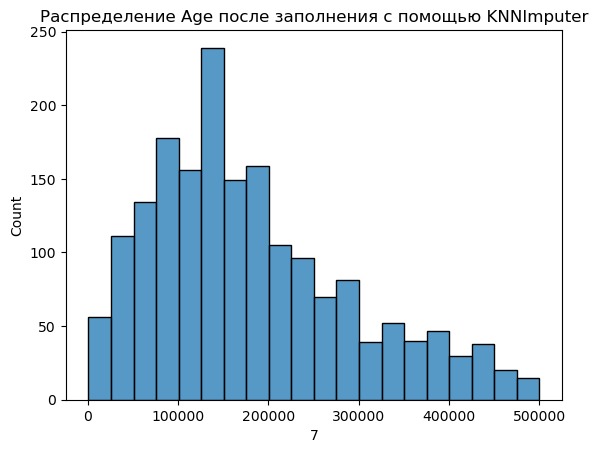

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# посмотрим на распределение возраста после заполнения пропусков
sns.histplot(fil_df[7], bins = 20)
plt.title('Распределение Age после заполнения с помощью KNNImputer');

In [37]:
fil_df.describe()

,0,1,2,3,4,5,6,7,8
count,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000
mean,250132.417961,105.059796,9.019284,30.320065,59.928093,8.550567,44.631405,182743.364298,1.567493
std,70669.794619,82.582223,7.862459,0.091875,0.078489,6.916421,22.784069,112125.462238,0.495560
min,33750.000000,1.000000,1.000000,29.766935,59.684086,0.120000,1.000000,1000.000000,1.000000
25%,204715.500000,56.225000,2.000000,30.274698,59.879240,3.640000,27.000000,100000.000000,1.000000
50%,251954.800000,89.000000,6.000000,30.326244,59.932915,7.050000,41.000000,157400.000000,2.000000
75%,294385.600000,132.970000,14.000000,30.371806,59.984420,11.695000,59.000000,246500.000000,2.000000
max,450000.000000,1256.000000,40.000000,30.583368,60.119969,62.310000,127.000000,500000.000000,2.000000


In [19]:
# fil_df = fil_df[0:7]

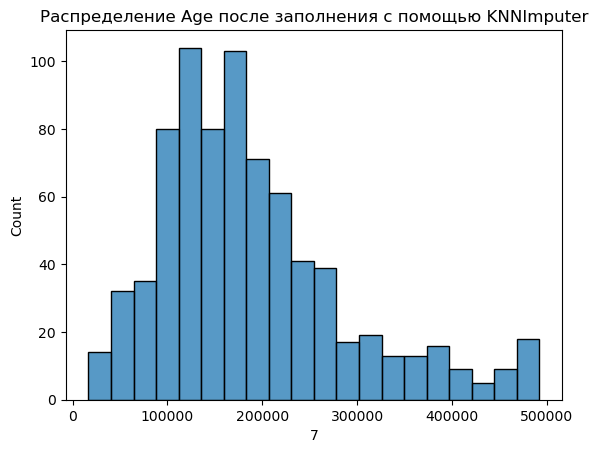

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# посмотрим на распределение возраста после заполнения пропусков
sns.histplot(fil_df[7], bins = 20)
plt.title('Распределение Age после заполнения с помощью KNNImputer');

In [21]:
fil_df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,-0.082124,0.233634,-0.103143,0.032236,-0.104169,0.019418,-0.044293,NaN
1,-0.082124,1.000000,0.000963,-0.028868,0.032740,0.012390,0.065908,0.831973,NaN
2,0.233634,0.000963,1.000000,-0.037721,0.148209,0.238121,-0.044779,-0.002263,NaN
3,-0.103143,-0.028868,-0.037721,1.000000,0.072065,-0.306749,-0.065492,-0.036948,NaN
4,0.032236,0.032740,0.148209,0.072065,1.000000,-0.264722,0.112165,0.000129,NaN
5,-0.104169,0.012390,0.238121,-0.306749,-0.264722,1.000000,-0.319025,-0.019719,NaN
6,0.019418,0.065908,-0.044779,-0.065492,0.112165,-0.319025,1.000000,0.065012,NaN
7,-0.044293,0.831973,-0.002263,-0.036948,0.000129,-0.019719,0.065012,1.000000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
from scipy.stats import pearsonr

for i in fil_df.columns:
    print(f"{i}:{pearsonr(fil_df[0], fil_df[i])}")

0:PearsonRResult(statistic=1.0, pvalue=0.0)
1:PearsonRResult(statistic=-0.12569982563598658, pvalue=7.752324561989131e-08)
2:PearsonRResult(statistic=0.204154681131778, pvalue=1.5741835553831173e-18)
3:PearsonRResult(statistic=-0.05561225864736898, pvalue=0.017815026673926395)
4:PearsonRResult(statistic=0.057743324566722105, pvalue=0.013878745862789315)
5:PearsonRResult(statistic=-0.10811672622906963, pvalue=3.903761664238933e-06)
6:PearsonRResult(statistic=0.10847934225952739, pvalue=3.6212130482886295e-06)
7:PearsonRResult(statistic=-0.12428688190203384, pvalue=1.08469540214159e-07)
8:PearsonRResult(statistic=-0.012733651376169965, pvalue=0.587723675728923)


In [39]:
fil_df.to_csv('filled_data1.csv',encoding='utf-8')